# **DATA 1**

In [ ]:
#ANSWER 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data1= pd.read_csv('/content/data1.csv',header=None)
data1.head()

,0,1,2
0,1.10500,-2.60510,34.2610
1,0.30463,1.55360,1.1477
2,2.67450,1.17810,15.6260
3,-3.54260,0.79471,-12.7760
4,-0.22632,4.44160,-21.7230


In [ ]:
#Data Preparation
X= data1.iloc[:,:-1]
Y= data1.iloc[:,-1]
df1=X.copy()
for col in df1.columns:
  df1[col]=(df1[col]-df1[col].min())/(df1[col].max()-df1[col].min())
print('Normalized Data->')
print(df1.head(),'\n')
print(Y.head())

Normalized Data->
          0         1
0  0.613324  0.240136
1  0.532142  0.657458
2  0.772520  0.619777
3  0.141912  0.581304
4  0.478287  0.947266 

0    34.2610
1     1.1477
2    15.6260
3   -12.7760
4   -21.7230
Name: 2, dtype: float64


In [ ]:
#Initial Conditions
W = np.zeros(X.shape[1])
W0 = 0

#Cost Function
def cost(x,y,w,w0,k):
  pred = x.dot(w)
  pred += np.full_like(pred, w0)
  loss = pred - y
  cost_value = ((1/2) * np.sum(np.square(loss))) + (k/2)*np.square(np.linalg.norm(w))
  return cost_value

#Gradient Function
def grad(x,y,w,w0,lr,k,iter):
  n = len(y)
  cost_iter = np.zeros(iter)
  for i in range(iter):
    for j in range(n):
      pred = x.iloc[j].dot(w)
      pred += np.full_like(pred, w0)
      loss = pred - y.iloc[j]
      w0 = w0 - lr * loss
      w = w * (1 - lr * k) - np.dot(lr * loss, x.iloc[j])
    cost_iter[i] = cost(x,y,w,w0,k)
  return w,w0,cost_iter

W_final, W0_final,cost_values= grad(X,Y,W,W0,lr=0.01,k=0.01,iter=10)
print(f'The parameters of the model are: {W0}')
for i in W_final:
  print(i)

The parameters of the model are: 0
4.616159490955061
-6.828950316556181


In [ ]:
pred= X.dot(W_final)+W0_final
print((pred[0:5]))
print(Y[0:5])

0    29.072850
1    -3.021341
2    10.482627
3   -15.598346
4   -25.194300
dtype: float64
0    34.2610
1     1.1477
2    15.6260
3   -12.7760
4   -21.7230
Name: 2, dtype: float64


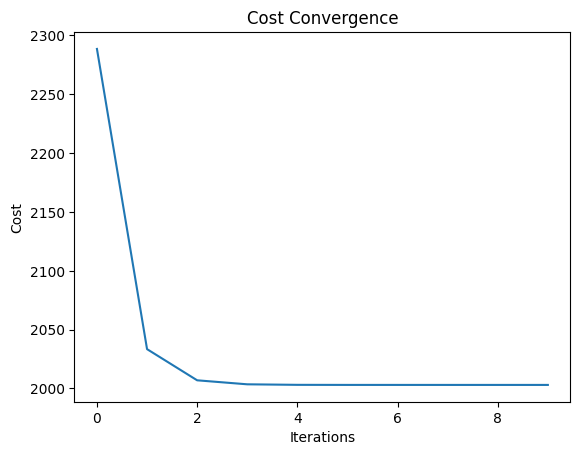

In [ ]:
#Cost Convergence
plt.title('Cost Convergence')
plt.plot(cost_values)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

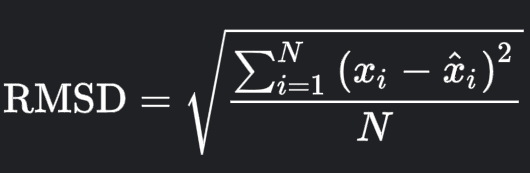

In [ ]:
#Data Splitting
test_size= int(X.shape[0]/8)
x_test= X[:test_size]
y_test= Y[:test_size]
x_train= X[test_size:]
y_train= Y[test_size:]

#Performance Measure
def rmse():
  n= X.shape[0]
  W_final, W0_final,cost_values= grad(x_train,y_train,W,W0,lr=0.01,k=0.01,iter=10)
  pred= x_test.dot(W_final)+W0_final
  loss= pred-y_test
  return np.sqrt(np.sum(np.square(loss)/n))
print('Performance of the model: RMSE-',rmse())

Performance of the model: RMSE- 1.6948037513336773


# **DATA 2**

In [ ]:
data2= pd.read_csv('/content/data2.csv',header=None)
data2.head()
data2= data2.sample(frac=1).reset_index(drop=True)

In [ ]:
#Data Preparation
X= data2.iloc[:,:-1]
Y= data2.iloc[:,-1]
y= np.array(Y)
y[y==-1]=0
df2=X.copy()
for col in df2.columns:
  df2[col]=(df2[col]-df2[col].min())/(df2[col].max()-df2[col].min())
print('Normalized Data->')
print(df2.head(),'\n')

Normalized Data->
          0         1         2
0  0.469555  0.348798  0.249769
1  0.299345  0.410370  0.025185
2  0.744474  0.242046  0.224594
3  0.342932  0.023917  0.565978
4  0.846349  0.692740  0.415187 



In [ ]:
#Data Splitting
test_size= int(X.shape[0]/8)
x_test= X[:test_size]
y_test= y[:test_size]
x_train= X[test_size:]
y_train= y[test_size:]

In [ ]:
#Initial Conditions


# def sig(x):
  # return 1/(1+np.exp(-x))

def logReg(X,W):
  # return sig(X.dot(W))
  return 1/ 1+np.exp(-(X.dot(W)))

def lossFunc(y_true, y_pred):
  ep=1e-15
  return -(y_true*(np.log(y_pred) + (1-y_true)*(1-np.log(1-y_pred)))).mean()

loss_N=[]
weights=[]


def gradFunc(X, Y ,lr, it,k):
    w=np.zeros(X.shape[1])
    w0=np.zeros(1)
    n = len(Y)
    cost=[]
    for i in range(it):
        y_pred = logReg(X,w) + w0
        loss = lossFunc(Y, y_pred)
        loss_N.append(loss)
        cost.append(i)
        grad = np.dot(X.T, (y_pred - Y)) / n
        w = w - lr * grad + (k/2)* (np.square(np.linalg.norm(W)))
        w0 = w0 - lr* (y_pred-Y)

    weights.append(w)
    weights.append(w0)
    return w,w0,weights, loss_N, cost

W_final,W0_final,weights, losses,cost = gradFunc(x_train, y_train, lr=0.000000000001, it=1000,k=0.1)

def pred(X,W):
  probs=logReg(X,W)
  cl=[]
  for i in probs:
    if i>=0.5:
      cl.append(1)
    else:
      cl.append(0)
  # return (probs>=0.5).astype(int)
  return cl

prediction=pred(x_test,W_final)
for i in W_final:
  print(i)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


5.6159670608908716e-09
-6.995098777322706e-09
-1.1551789469663683e-09


**2(a)Report the hyperparameters**

In [ ]:
for i in W_final:
  print(i)


5.6159670608908716e-09
-6.995098777322706e-09
-1.1551789469663683e-09


**2(C)Assess the performance of the model.**

TP TN FP FN
10 0 15 0 
________________________________________________________________________
accuracy:  0.4
Sensitivity:  1.0
Specificity:  0.0
Precision:  0.4
Fmeasure:  0.5714285714285715






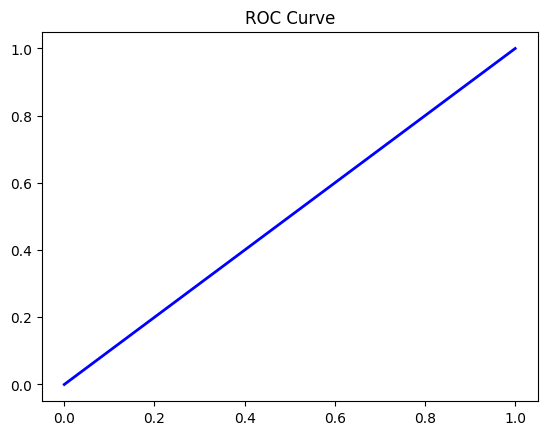

In [ ]:

from sklearn.metrics import roc_curve, auc

Y_labels= [0 if i == -1 else i for i in y_test]
Y_output= prediction

tp=tn=fp=fn=0
for actual, predicted in zip(Y_labels, Y_output):
        if actual == 1 and predicted == 1:
            tp += 1
        elif actual == 0 and predicted == 0:
            tn += 1
        elif actual == 0 and predicted == 1:
            fp += 1
        elif actual == 1 and predicted == 0:
            fn += 1

print('TP TN FP FN')
print(tp,tn,fp,fn,'\n________________________________________________________________________')
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
f_measure = 2*precision*sensitivity/(sensitivity+precision)
accuracy= (tp+tn)/ (tp+tn+fp+fn)
print('accuracy: ',accuracy)
print('Sensitivity: ',sensitivity)
print('Specificity: ',specificity)
print('Precision: ',precision)
print('Fmeasure: ',f_measure)
print('\n\n\n')

X_axis,Y_axis, _ = roc_curve(Y_labels, Y_output)
roc_auc = auc(X_axis, Y_axis)
plt.plot(X_axis,Y_axis,lw=2,color='blue' %roc_auc)
plt.title('ROC Curve')
plt.show()

3. Regularisation is an approach in Linear regression to prevent overfitting and imporoves generalization performance of the model. \
But in Ridge Regression an extra penalty term is there so as to maintain the coefficient values in the model. This penalty term is the 2-Norm of the regression coefficients. \\
*Tikhonov Regularisation*: It is the ridge regression performed on the data by taking one extra penalty in the Cost function. \
Cost Function with Tikhonov Regularization:\
      J(θ) = OLS Cost + λ * ||θ||² \
*Ivanov Regularisation*: Ivanov regularization is a variation of regularization techniques used in statistical modeling, particularly in the context of linear regression.

*Comparision* \
 Ivanov regularisation can be studied under minimal assumptions. In particular, we assume only that the RKHS is separable with a bounded and measurable kernel. We provide rates of convergence for the expected squared L2
 error of our estimator under the weak assumption that the variance of the response variables is bounded and the unknown regression function lies in an interpolation space between L2
 and the RKHS. We then obtain faster rates of convergence when the regression function is bounded by clipping the estimator.      


# **(4)AUTOMPG DATA**

In [ ]:
#AutoMPG Data
auto_data= pd.read_csv('/content/auto-mpg.csv',header= None)
X= auto_data.iloc[:,:-1]
# X= auto.iloc[:,:-1]
y = auto_data.iloc[:, -1]
y = pd.factorize(y)[0]
print(X.head())
print(y[0:5])

     0          1             2           3       4             5           6  \
0  mpg  cylinders  displacement  horsepower  weight  acceleration  model year   
1   18          8           307         130    3504            12          70   
2   15          8           350         165    3693          11.5          70   
3   18          8           318         150    3436            11          70   
4   16          8           304         150    3433            12          70   

        7  
0  origin  
1       1  
2       1  
3       1  
4       1  
[0 1 2 3 4]


In [ ]:
###Applying Ridge Regression on the dataset
#Initial Conditions
W = np.zeros(X.shape[1])
W0 = 0

#Cost Function
def cost(x,y,w,w0,k):
  pred = x.dot(w)
  pred += np.full_like(pred, w0)
  loss = pred - y
  cost_value = ((1/2) * np.sum(np.square(loss))) + (k/2)*np.square(np.linalg.norm(w))
  return cost_value

#Gradient Function
def grad(x,y,w,w0,lr,k,iter):
  n = len(y)
  cost_iter = np.zeros(iter)
  for i in range(iter):
    for j in range(n):
      pred = np.dot(x.iloc[j],w)
      pred += np.full_like(pred, w0)
      loss = pred - y.iloc[j]
      w0 = w0 - lr * loss
      w = w * (1 - lr * k) - np.dot(lr * loss, x.iloc[j])
    cost_iter[i] = cost(x,y,w,w0,k)
  return w,w0,cost_iter

W_final, W0_final,cost_values= grad(X,y,W,W0,lr=0.01,k=0.01,iter=10)
print(f'The parameters of the model are: {W0}')
for i in W_final:
  print(i)

TypeError: ignored

In [ ]:
w= np.zeros(X.shape[1])
np.dot(X,w)

TypeError: ignored

In [ ]:
###Applying Linear Regression on the dataset

In [ ]:
#Performance Comparision


# **(5)DATA 3**

In [ ]:
data3= pd.read_csv('/content/data3.csv',header= None)
df3= data3.copy()

#Data Preparation
for col in df3:
  df3[col]=df3[col]- df3[col].min()/ df3[col].max()-df3[col].min()

X= df3.iloc[:,:-1]
y= df3.iloc[:,-1]
df3.head()

,0,1,2
0,6.796722,2.606883,41.758537
1,7.062222,4.682183,20.030537
2,3.964267,4.671523,1.365437
3,3.822352,3.832643,0.206637
4,5.517022,5.365783,2.383737


**(a)Report the parameters of the model.**

In [ ]:
#Direct Method- first approach
def direct_method1(X,y):
  k=4
  first= (np.dot(X.T,X)+ np.dot(np.full_like((k),X.shape[1]),np.eye(X.shape[1])))
  middle= np.dot(np.linalg.inv(first),X.T)
  w01= np.ones((y.shape))
  diff= y-w01
  prod= np.dot(middle,diff)
  return prod

#Direct Method- second approach
def direct_method2(X,y):
  k=4
  X=np.c_[np.ones((len(X),1)),X]
  eye2=(k*np.eye(X.shape[1]))
  eye2[0][0]=0
  first= (np.dot(X.T,X)+k*eye2)
  middle= np.dot(np.linalg.inv(first),X.T)
  prod= np.dot(middle,y)
  return prod

w1= direct_method1(X,y)
w2= direct_method2(X,y)
print('Direct Method: First approach',w1)
print('Direct Method: Second approach',w2)


Direct Method: First approach [0.52865523 0.52553089]
Direct Method: Second approach [5.19540518 0.00879617 0.01773345]


**(b) Report the performance of the model.**

In [ ]:
#Performance Measures
def rmse(X,y,w):
  pred= X.dot(w)
  return (np.sqrt(np.sum(np.square(pred-y)))) /(X.shape[0])

print('Performace measure of First Approach: RMSE-', '%.2f' %rmse(X,y,w1))
print('Performace measure of Second Approach: RMSE-', '%.2f' %rmse(X,y,w2[0:2]))

Performace measure of First Approach: RMSE- 0.51
Performace measure of Second Approach: RMSE- 1.27


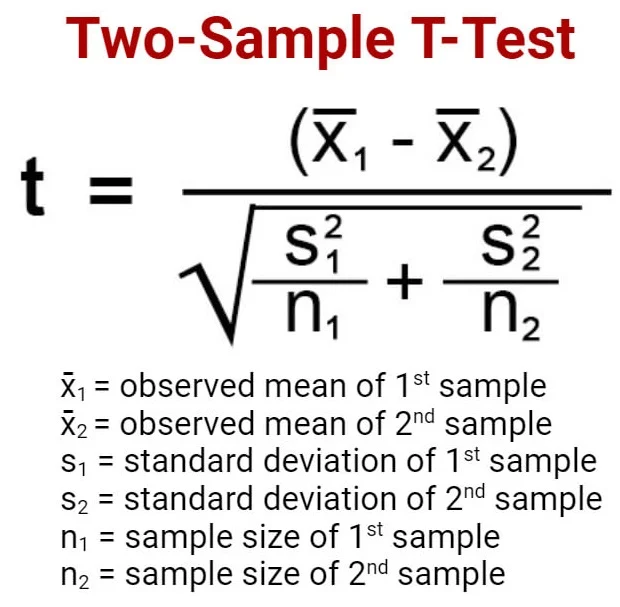

**5(c)(c) Compare the performance of the two models by using t test**

In [ ]:
#T-test
import statistics
def T_test():
  w1=direct_method1(X,y)
  w2=direct_method2(X,y)

  #Predicted Data1, Data2
  actual1= np.dot(X,w1)
  actual2= np.dot(X,w2[0:-1])

  #Statistical quantities
  n= actual1.shape[0]
  m1= np.mean(actual1)
  m2= np.mean(actual2)
  s1= statistics.stdev(actual1)
  s2= statistics.stdev(actual2)

  num= m1-m2
  den= (np.square(s1)+ np.square(s2))/n

  value= num/ np.sqrt(den)
  return value

print('T-test Result of the two samples is:',T_test())

T-test Result of the two samples is: -44.441691823804085


# **(6)Analyze DATA 4 using decession tree**

**Procedure for analyzing decision tree**\
The decision is constructed based on the entropy and gain information retained by each attribute in the dataset.

    Entropy= Sum(probability(xi) * log(probability(xi))
    Information gain= Entropy(y) - Entropy(y,xj)     
                                              where xj is attribute of X
\\
The attribute having highest information gain is taken as the root note of the decision tree. Then this continuously repeated for all other attributes until the leaf nodes are output labels. This is the procedure and implementation of decision tree.

In [ ]:
data4= pd.read_csv('data4.csv',header= None)
df4 = data4.copy()

#Normalisation of data
for col in df4:
  df4[col]= df4[col]- df4[col].min()/ df4[col].max()- df4.min()

data4.head()

,0,1,2,3
0,1,1,1,1
1,1,1,2,1
2,1,1,3,1
3,1,1,5,1
4,1,1,7,1


Annotation(0.602941, 0.928571, 'x[1] <= 3.5\ngini = 0.462\nsamples = 141\nvalue = [90, 51]') 

Annotation(0.602941, 0.928571, 'x[0] <= 5.5\ngini = 0.484\nsamples = 83\nvalue = [34, 49]') 

Annotation(0.382353, 0.785714, 'x[0] <= 3.5\ngini = 0.245\nsamples = 56\nvalue = [8, 48]') 

Annotation(0.235294, 0.642857, 'x[1] <= 2.5\ngini = 0.054\nsamples = 36\nvalue = [1, 35]') 

Annotation(0.117647, 0.5, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]') 

Annotation(0.117647, 0.5, 'x[2] <= 4.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]') 

Annotation(0.176471, 0.357143, 'x[0] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]') 

Annotation(0.117647, 0.214286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]') 

Annotation(0.117647, 0.214286, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]') 

Annotation(0.176471, 0.357143, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]') 

Annotation(0.235294, 0.642857, 'x[2] <= 3.5\ngini = 0.455\nsamples = 20\nvalue = [7, 13]') 

Annotation(0.352941, 0.5, 'gini = 0.0\nsamples = 5\nvalu

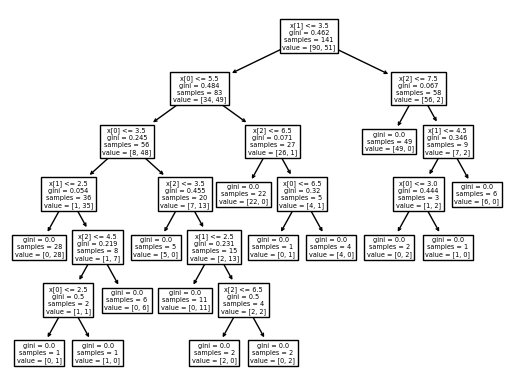

In [ ]:
#Data Preparation
X = data4.iloc[:,:-1]
y = data4.iloc[:,-1]

#Data Splitting
test_size= int(X.shape[0]/8)
x_test= X[:test_size]
y_test= y[:test_size]
x_train= X[test_size:]
y_train= y[test_size:]

from sklearn import tree
clf= tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
for i in tree.plot_tree(clf):
  print(i,'\n')


**6(b) Access the performance of the model**

In [ ]:
#Performance of the model

y_pred= clf.predict(x_test)
def chi(y_pred,y_test):
  return np.sqrt(np.sum((y_pred-y_test)/y_pred))

print('The performance of the devised model using Chi-Square is',chi(y_pred,y_test))

The performance of the devised model using Chi-Square is 2.0


# **DATA 5**

In [ ]:
data5= pd.read_csv('/content/drive/MyDrive/DM/assignment9/data5.csv',header= None)
df5 = data5.copy()

#Normalisation of data
for col in df5:
  df5[col]= df5[col]- df5[col].min()/ df5[col].max()- df5.min()

data5.head()

,0,1,2,3
0,-48.780,-5.5458,2.4477,-1
1,-48.612,-39.2840,12.7950,-1
2,-46.885,-16.0340,-8.8351,1
3,-46.384,-40.1080,-17.2380,1
4,-46.007,-19.0540,-17.6810,1


Annotation(0.491071, 0.928571, 'x[2] <= 19.068\ngini = 0.5\nsamples = 183\nvalue = [90, 93]') 

Annotation(0.491071, 0.928571, 'x[0] <= 15.351\ngini = 0.486\nsamples = 120\nvalue = [70, 50]') 

Annotation(0.285714, 0.785714, 'x[1] <= -26.78\ngini = 0.332\nsamples = 57\nvalue = [45, 12]') 

Annotation(0.142857, 0.642857, 'x[0] <= -15.39\ngini = 0.494\nsamples = 18\nvalue = [8, 10]') 

Annotation(0.0714286, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]') 

Annotation(0.0714286, 0.5, 'x[2] <= -35.019\ngini = 0.397\nsamples = 11\nvalue = [8, 3]') 

Annotation(0.107143, 0.357143, 'x[0] <= 3.691\ngini = 0.375\nsamples = 4\nvalue = [1, 3]') 

Annotation(0.0714286, 0.214286, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]') 

Annotation(0.0714286, 0.214286, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]') 

Annotation(0.107143, 0.357143, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]') 

Annotation(0.142857, 0.642857, 'x[2] <= -47.608\ngini = 0.097\nsamples = 39\nvalue = [37, 2]') 

Annotation(0.214286, 0.5, 'gi

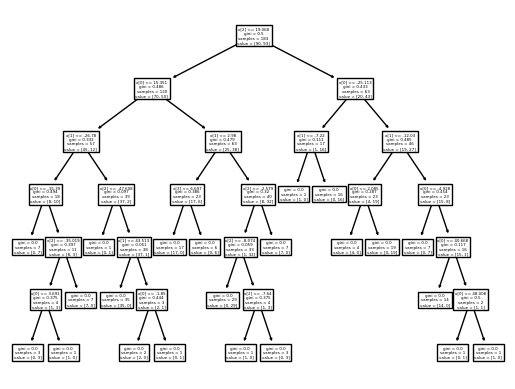

In [ ]:
#Data Preparation
X = data5.iloc[:,:-1]
y = data5.iloc[:,-1]

#Data Splitting
test_size= int(X.shape[0]/8)
x_test= X[:test_size]
y_test= y[:test_size]
x_train= X[test_size:]
y_train= y[test_size:]

from sklearn import tree
clf= tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
for i in tree.plot_tree(clf):
  print(i,'\n')


In [ ]:
#Performance of the model

y_pred= clf.predict(x_test)
def chi(y_pred,y_test):
  return np.sqrt(np.sum((y_pred-y_test)/y_pred))

print('The performance of the devised model using Chi-Square is',chi(y_pred,y_test))

The performance of the devised model using Chi-Square is 4.0


# **DATA 6**

**Preprocessing procedure**\
Huge amount of preprocessing work is done with this data. The first step taken is to build the dataset. This is done by finding the nth powers of data first attribute. And all these powered- attribute values are vertically stacked and the dataset of n-columns is prepared. \



**Validation procedure**\
The whole dataset is again further broken down into 2sets- \
namely\
      Training set,\
      Testing set\
The training set is used to find the coefficents of the model approximately such that the cost function is minimised.
With those coefficients the generalisation error is determined.


In [ ]:
data6= pd.read_csv('data6.csv',header= None)

#Data Preparation
X= data6.iloc[:,0]
y= data6.iloc[:,-1]
data6.head()

,0,1
0,1.46210,8.527200
1,-2.36450,12.077000
2,1.08940,2.808600
3,-0.22044,-0.088805
4,-1.72700,15.003000


In [ ]:
#5th degree polynomial models
x=[]
X5= np.zeros((X.shape[0],5))
for i in range(X.shape[0]):
  for j in range(1,6):
    x.append(X[i] **j)
x1= x[0:100]; x2=x[100:200]; x3=x[200:300];x4= x[300:400];x5=x[400:500]
X_t= np.vstack((x1,x2,x3,x4,x5))
Xp= X_t.T

In [ ]:
#Data Splitting
test_size= int(Xp.shape[0]/8)
x_test= Xp[:test_size]
y_test= y[:test_size]
x_train= Xp[test_size:]
y_train= y[test_size:]

**(b)Report the parameters of the model**

In [ ]:
#Initial Conditions
W = np.zeros(Xp.shape[1])
W0 = 0

#Cost Function
def cost(x,y,w,w0,k):
  pred = x.dot(w)
  pred += np.full_like(pred, w0)
  loss = pred - y
  cost_value = ((1/2) * np.sum(np.square(loss))) + (k/2)*np.square(np.linalg.norm(w))
  return cost_value

#Gradient Function
def grad(Xp,y,w,w0,lr,k,iter):
  x=pd.DataFrame(Xp)
  n = len(y)
  cost_iter = np.zeros(iter)
  for i in range(iter):
    for j in range(n):
      pred = x.iloc[j].dot(w)
      pred += np.full_like(pred, w0)
      loss = pred - y.iloc[j]
      w0 = w0 - lr * loss
      w = w * (1 - lr * k) - np.dot(lr * loss, x.iloc[j])
    cost_iter[i] = cost(x,y,w,w0,k)
  return w,w0,cost_iter

W_final, W0_final,cost_values1= grad(Xp,y,W,W0,lr=0.0001,k=0.1,iter=10)
print(f'The parameters of the model are: {W0}')
for i in W_final:
  print('%.2f'%i)

The parameters of the model are: 0
10.36
-2.34
-5.16
-6.60
3.46


In [ ]:
#Performance Measure
per=[]
def rmse():
  n= X.shape[0]
  W_final, W0_final,cost_values= grad(Xp,y,W,W0,lr=0.0001,k=0.1,iter=10)
  pred= x_test.dot(W_final)+W0_final
  loss= pred-y_test
  return np.sqrt(np.sum(np.square(loss)/n))
rmse1=rmse()
per.append(rmse1)
print('\nPerformance of the model: RMSE-','%.2f'%rmse1,'\n')


Performance of the model: RMSE- 146.70 



In [ ]:
#7th degree polynomial models
x=[]
X5= np.zeros((X.shape[0],7))
for i in range(X.shape[0]):
  for j in range(1,8):
    x.append(X[i] **j)
x1= x[0:100]; x2=x[100:200]; x3=x[200:300];x4= x[300:400];x5=x[400:500];x6=x[500:600];x7=x[600:700]
X_t= np.vstack((x1,x2,x3,x4,x5,x6,x7))
Xp= X_t.T

In [ ]:
#Data Splitting
test_size= int(Xp.shape[0]/8)
x_test= Xp[:test_size]
y_test= y[:test_size]
x_train= Xp[test_size:]
y_train= y[test_size:]

In [ ]:
#Initial Conditions
W = np.zeros(Xp.shape[1])
W0 = 0

#Cost Function
def cost(x,y,w,w0,k):
  pred = x.dot(w)
  pred += np.full_like(pred, w0)
  loss = pred - y
  cost_value = ((1/2) * np.sum(np.square(loss))) + (k/2)*np.square(np.linalg.norm(w))
  return cost_value

#Gradient Function
def grad(Xp,y,w,w0,lr,k,iter):
  x=pd.DataFrame(Xp)
  n = len(y)
  cost_iter = np.zeros(iter)
  for i in range(iter):
    for j in range(n):
      pred = x.iloc[j].dot(w)
      pred += np.full_like(pred, w0)
      loss = pred - y.iloc[j]
      w0 = w0 - lr * loss
      w = w * (1 - lr * k) - np.dot(lr * loss, x.iloc[j])
    cost_iter[i] = cost(x,y,w,w0,k)
  return w,w0,cost_iter

W_final, W0_final,cost_values2= grad(Xp,y,W,W0,lr=0.000001,k=8,iter=10)
print(f'The parameters of the model are: {W0}')
for i in W_final:
  print('%.2f'%i)

The parameters of the model are: 0
0.05
-0.06
0.03
-0.01
-0.08
-0.02
-0.06


In [ ]:
#Performance Measure
def rmse():
  n= X.shape[0]
  W_final, W0_final,cost_values= grad(Xp,y,W,W0,lr=0.000001,k=8,iter=10)
  pred= x_test.dot(W_final)+W0_final
  loss= pred-y_test
  return np.sqrt(np.sum(np.square(loss)/n))
rmse2=rmse()
per.append(rmse2)
print('\nPerformance of the model: RMSE-','%.2f'%rmse2,'\n')


Performance of the model: RMSE- 15.44 



In [ ]:
#8th degree polynomial models
x=[]
X5= np.zeros((X.shape[0],8))
for i in range(X.shape[0]):
  for j in range(1,9):
    x.append(X[i] **j)
x1= x[0:100]; x2=x[100:200]; x3=x[200:300];x4= x[300:400];x5=x[400:500];x6=x[500:600];x7=x[600:700];x8=x[700:800]
X_t= np.vstack((x1,x2,x3,x4,x5,x6,x7,x8))
Xp= X_t.T

In [ ]:
#Data Splitting
test_size= int(Xp.shape[0]/8)
x_test= Xp[:test_size]
y_test= y[:test_size]
x_train= Xp[test_size:]
y_train= y[test_size:]

In [ ]:
#Initial Conditions
W = np.zeros(Xp.shape[1])
W0 = 0

#Cost Function
def cost(x,y,w,w0,k):
  pred = x.dot(w)
  pred += np.full_like(pred, w0)
  loss = pred - y
  cost_value = ((1/2) * np.sum(np.square(loss))) + (k/2)*np.square(np.linalg.norm(w))
  return cost_value

#Gradient Function
def grad(Xp,y,w,w0,lr,k,iter):
  x=pd.DataFrame(Xp)
  n = len(y)
  cost_iter = np.zeros(iter)
  for i in range(iter):
    for j in range(n):
      pred = x.iloc[j].dot(w)
      pred += np.full_like(pred, w0)
      loss = pred - y.iloc[j]
      w0 = w0 - lr * loss
      w = w * (1 - lr * k) - np.dot(lr * loss, x.iloc[j])
    cost_iter[i] = cost(x,y,w,w0,k)
  return w,w0,cost_iter

W_final, W0_final,cost_values3= grad(Xp,y,W,W0,lr=0.0000001,k=10,iter=80)
print(f'The parameters of the model are: {W0}')
for i in W_final:
  print('%.2f'%i)

The parameters of the model are: 0
0.02
0.00
0.02
0.00
0.03
0.00
-0.00
0.00


In [ ]:
#Performance Measure
def rmse():
  n= X.shape[0]
  W_final, W0_final,cost_values= grad(Xp,y,W,W0,lr=0.0000001,k=10,iter=80)
  pred= x_test.dot(W_final)+W0_final
  loss= pred-y_test
  return np.sqrt(np.sum(np.square(loss)/n))
rmse3=rmse()
per.append(rmse3)
print('\nPerformance of the model: RMSE-','%.2f'%rmse3,'\n')


Performance of the model: RMSE- 9.68 



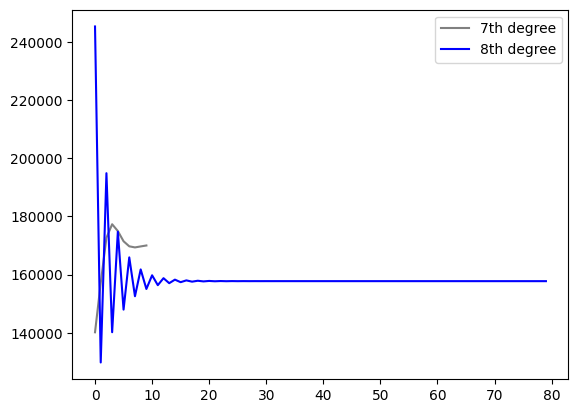

In [ ]:
#Plotting the models
#plt.plot(cost_values1,label='5th degree',c='black')
plt.plot(cost_values2,label='7th degree',c='grey')
plt.plot(cost_values3,label='8th degree',c='blue')
plt.legend()
plt.show()

In [ ]:
#Comparision of performances of different models
print('Performance Measures of 5th, 7th and 8th degreee polynomial expression models are-',per)
print('Best performing model is:','%.3f'%per[np.argmin(per)])

Performance Measures of 5th, 7th and 8th degreee polynomial expression models are- [146.6995067218713, 15.444355362627475, 9.6829845056219]
Best performing model is: 9.683


# **DATA 7**

**KNN Algorithm** \
The whole data is firstly splitted into training set and testing set by applying cross validation technique in the ratio of 80:20.\
Then the testing data points are taken individually. Suppose A(xi,yi) is a datapoint taken from the testing dataset then,\
Euclidean distance/ Mahalonabis distance from point A to all the datapoints present in training dataset is determined. '**K**' is an arbitrary integer value choosen. Then these distances are written in non-decreasing order. The first k-distances and its corresponding classes and to be considered. \
Then the majority class is determined in those K classes. The datapoint A is also to be considered in that majority class.

In [ ]:
data7= pd.read_csv('data7.csv',header= None)
data7.head()
data7= data7.sample(frac=1).reset_index(drop=True)

#Data Splitting
X= data7.iloc[:,:-1]
y= data7.iloc[:,-1]
test_size= int(X.shape[0]/8)
x_test= X[:test_size]
x_train= X[test_size:]
y_test= y[:test_size]
y_train= y[test_size:]

print(y.head())
# print(len(y_train),len(y_test))
# x_test.head()

0    1
1    0
2    0
3    0
4    0
Name: 3, dtype: int64


In [ ]:
print(y_test.shape)

(50,)


**Mahalonabis Distance**


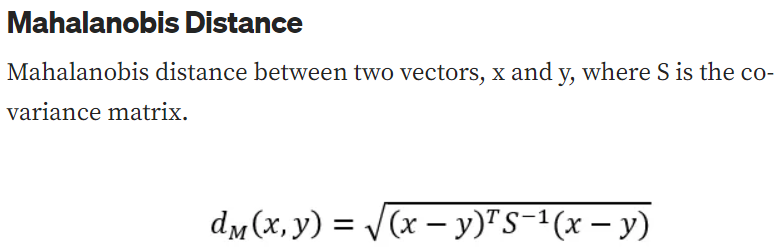
\
**Manhattan Distance**



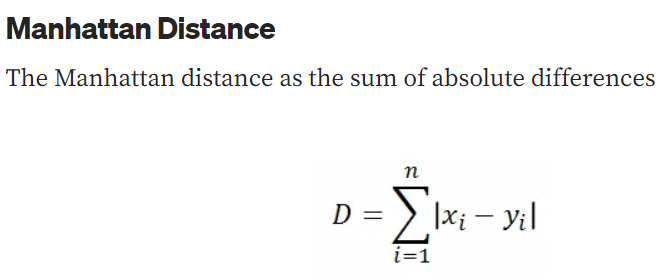
\
**Euclidean Distance**
\

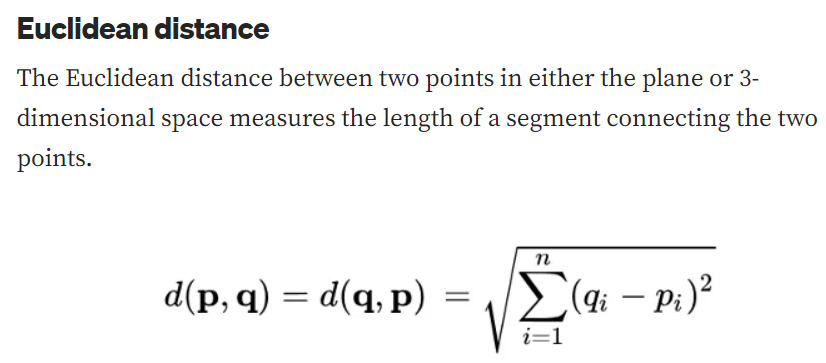

In [ ]:
# KNN algorithm

#Important metrics used in the distance measures
mean= np.mean(X,axis=0)
cov_i= np.linalg.inv(X.cov())

def maha(x):
  diff= x-mean
  return np.sqrt(np.dot(np.dot(diff.T,cov_i),diff))

In [ ]:
m=[]
for i in range(len(X)):
  for j in range(len(x_test)):
    m.append(maha(x_test.iloc[j]))
print(len(m))

20000


In [ ]:

def kmaha():
  dis=[]
  for i in range(x_test.shape[0]):
      md= maha(x_test.iloc[i])
      dis.append(md)
  maj=[];inds=[]
  k=25
  temp= dis.copy()
  temp.sort()
  for index in range(len(temp)):
      if index<k:
          maj.append(temp[index])
      else:
        break
  for i in range(len(dis)):
    for j in range(len(maj)):
      if(dis[i]==maj[j]):
        inds.append(i)
  classes=[]
  c1=0; c0=0
  for i in ((y[inds])):
    if i==1:
      c1+=1
      classes.append(1)
    else:
      c0+=1
      classes.append(0)
  pred= np.bincount(classes).argmax()
  # predictions=[]
  return pred

# for i

#predictions.append(pred)
#print('Actual class of Datapoint:',pred)
#print('Predicted class of Datapoint:',y.iloc[j])
#print(len(dis))
y_pred= kmaha()

In [ ]:
#Euclidean Distance
def euc(train,test):
  return np.sqrt(np.sum(np.square(train-test)))

ed=[]
for i in range(len(x_test)):
  for j in range(len(x_train)):
    ed.append(euc(x_test.iloc[i],x_train.iloc[j]))
print(len(ed))

17500


# **CANCER DATASET**

**Preprocessing Techniques**
\
*Data Cleaning:* The data has to be cleaned and filtered as the raw data is not compatible for data processing.
\
*Attribute Discretization:* The attribute values that take different non-integer values has to discretized into integer-format. Then the data is ready for processing and analyzing.


In [ ]:
cancer= pd.read_csv('/content/data.csv',header=None)
cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,NaN
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,NaN
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,NaN
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,NaN


In [ ]:
#Data Preparation
X = cancer.iloc[:,:-1]
y1= cancer.iloc[:,-1]
m=(np.mean(y1))
y= []
for i in y1:
  if i>m:
    y.append(1)
  else:
    y.append(0)
# print(y)

#Data Splitting
test_size= int(X.shape[0]/8)
x_test= X[:test_size]
y_test= y[:test_size]
x_train= X[test_size:]
y_train= y[test_size:]

In [ ]:
#KNN
def knn(x,y,)

SyntaxError: ignored

In [ ]:
#T-test
import statistics
def T_test():

  #Predicted Data1, Data2

  #Statistical quantities
  n= actual1.shape[0]
  m1= np.mean(actual1)
  m2= np.mean(actual2)
  s1= statistics.stdev(actual1)
  s2= statistics.stdev(actual2)

  num= m1-m2
  den= (np.square(s1)+ np.square(s2))/n

  value= num/ np.sqrt(den)
  return value

print('T-test Result of the two samples is:',T_test())

In [ ]:
#Decision Tree
from sklearn import tree
clf= tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
for i in tree.plot_tree(clf):
  print(i,'\n')